Download events (/events/) & matches (/matches/) & players (./players.json) from https://figshare.com/collections/Soccer_match_event_dataset/4415000/3

In [2]:
import pandas as pd
import numpy as np
from collections import ChainMap
competition = 'Spain'
#events = pd.read_json('events/events_{}.json'.format(competition)).set_index('id')
#matches = pd.read_json('matches/matches_{}.json'.format(competition)).set_index('wyId')
#players = pd.read_json('players/players.json').set_index('wyId')

In [6]:
np.unique(events[events.eventName == 'Save attempt'].subEventName)

array(['Reflexes', 'Save attempt'], dtype=object)

In [11]:
np.unique(events.eventName)

array(['Duel', 'Foul', 'Free Kick', 'Goalkeeper leaving line',
       'Interruption', 'Offside', 'Others on the ball', 'Pass',
       'Save attempt', 'Shot'], dtype=object)

In [12]:
np.unique( events[events.eventName=='Free Kick'].subEventName)

array(['Corner', 'Free Kick', 'Free kick cross', 'Free kick shot',
       'Goal kick', 'Penalty', 'Throw in'], dtype=object)

# Matches 

In [ ]:
def filter_last_minutes_events(events, matchId, minutes=10):
    return events[(events['matchId']==matchId) & (events['matchPeriod']=='2H') & (events['eventSec']>(45-minutes)*60)]

In [ ]:
minutes = 10

In [3]:
def get_shots_season(events, shots, fks, penalties, saves, fouls):
    events = events[['eventName', 'subEventName', 'matchId']]
    events_shot = events[events.eventName == 'Shot']
    events_fk = events[(events.subEventName == 'Free kick shot')] # & (events.subEventName == 'Free kick cross')]
    events_penalty = events[events.subEventName == 'Penalty']
    events_save = events[events.subEventName == 'Reflexes']
    events_foul = events[events.eventName == 'Foul']
    del events
    #fkShots = ['Free kick shot', 'Penalty']
    #events_fk = events[ (events.eventName == 'Free Kick') & (events.subEventName.isin(fkShots) )]
    events_shot['Shots'] = events_shot.apply(lambda _: '1', axis=1)
    events_fk['FreeKicks'] = events_fk.apply(lambda _: '1', axis=1)
    events_penalty['Penalties'] = events_penalty.apply(lambda _: '1', axis=1)
    events_save['Saves'] = events_save.apply(lambda _: '1', axis=1)
    events_foul['Fouls'] = events_foul.apply(lambda _: '1', axis=1)
    
    fkShotsMatch = events_fk[['matchId','FreeKicks']].groupby('matchId').count()
    shotsMatch = events_shot[['matchId','Shots']].groupby('matchId').count()
    penaltiesMatch = events_penalty[['matchId','Penalties']].groupby('matchId').count()
    savesMatch = events_save[['matchId','Saves']].groupby('matchId').count()
    foulsMatch = events_foul[['matchId','Fouls']].groupby('matchId').count()
    
    del events_shot
    del events_fk
    del events_penalty
    del events_save
    
    fks.append(np.mean(fkShotsMatch.FreeKicks))
    penalties.append(np.mean(penaltiesMatch.Penalties))
    saves.append(np.mean(savesMatch.Saves))
    fouls.append(np.mean(foulsMatch.Fouls))
    #print (fks, penalties, saves, fouls)
    
    shotsDf = pd.merge(fkShotsMatch, shotsMatch, on ='matchId')
    #print(shotsDf.head())
    shotsDf['Total'] = shotsDf.FreeKicks + shotsDf.Shots
    #print(shots.Total)
    shots.append(np.mean(shotsDf.Total))
    #shots.append([np.mean(shots_array), np.std(shots_array)])
    return

shots = []
fks = []
penalties = []
saves = []
fouls = []
#get_shots_season(events, shots, penalties, fks, saves, fouls)
countries = ['England', 'France', 'Germany', 'Spain', 'Italy']
for country in countries:
    print(country)
    events = pd.read_json('events/events_{}.json'.format(country)).set_index('id')
    #get_shots_season(events,shots)
    get_shots_season(events, shots, penalties, fks, saves, fouls)
    #del events
shots, fks, penalties, saves, fouls

England
France
Germany
Spain
Italy


([23.775933609958507,
  23.838028169014084,
  24.268817204301076,
  22.535971223021583,
  24.580152671755727],
 [1.095890410958904,
  1.1517857142857142,
  1.1772151898734178,
  1.13,
  1.1559633027522935],
 [1.4522821576763485,
  1.8345070422535212,
  1.60752688172043,
  1.629496402877698,
  1.583969465648855],
 [5.63395225464191,
  5.406914893617022,
  5.970394736842105,
  5.63129973474801,
  5.562334217506631],
 [21.41578947368421,
  26.847368421052632,
  28.287581699346404,
  28.855263157894736,
  26.3])

In [4]:
import pandas as pd
competitions = ['England', 'France', 'Germany', 'Spain', 'Italy']


goalless = []
for competition in competitions:
    matches = pd.read_json('matches/matches_{}.json'.format(competition)).set_index('wyId')

    zz = 0
    for line in matches['teamsData']:
        k = list(line.keys())
        if line[k[0]]['score'] == 0 and line[k[1]]['score'] == 0:
            zz += 1
    print(competition, zz, len(matches), zz/len(matches))
    goalless.append(zz/len(matches)*100)
print(goalless)    

England 32 380 0.08421052631578947
France 21 380 0.05526315789473684
Germany 21 306 0.06862745098039216
Spain 28 380 0.07368421052631578
Italy 28 380 0.07368421052631578
[8.421052631578947, 5.526315789473684, 6.862745098039216, 7.368421052631578, 7.368421052631578]


In [5]:
def get_goals_season(matches, goalList):
    goalArray = []
    for i in range(len(matches)):
        scoreString = np.array(matches.label.iloc[i].split())[-3:]
        goalArray.append(int(scoreString[0]) + int(scoreString[2]))
    goalList.append(np.mean(goalArray))
    return
    
countries = ['England', 'France', 'Germany', 'Spain', 'Italy']
goals = []
for country in countries:
    matches = pd.read_json('matches/matches_{}.json'.format(country)).set_index('wyId')
    get_goals_season(matches, goals)
    print(country)
goals

England
France
Germany
Spain
Italy


[2.6789473684210527,
 2.718421052631579,
 2.7941176470588234,
 2.694736842105263,
 2.6763157894736844]

In [7]:
shots = np.array(shots)
goals = np.array(goals)

#shotsGoals = pd.DataFrame({'Country':countries , 'Goals':goals[:,0], 'GoalsStd':goals[:,1],'Shots':shots[:,0], 'ShotsStd':shots[:,1]})
matchDf = pd.DataFrame({'Country':countries , 'Goals':goals, 'Shots':shots, 'Freekicks':fks, 'Penalties':penalties, 'Saves':saves, 'Fouls':fouls})
#
matchDf.head()

,Country,Goals,Shots,Freekicks,Penalties,Saves,Fouls
0,England,2.678947,23.775934,1.095890,1.452282,5.633952,21.415789
1,France,2.718421,23.838028,1.151786,1.834507,5.406915,26.847368
2,Germany,2.794118,24.268817,1.177215,1.607527,5.970395,28.287582
3,Spain,2.694737,22.535971,1.130000,1.629496,5.631300,28.855263
4,Italy,2.676316,24.580153,1.155963,1.583969,5.562334,26.300000


In [41]:
properties = ['Goals', 'Shots', 'Freekicks', 'Penalties', 'Saves','Fouls' ]
value = np.array([goals[3], shots[3], fks[3], penalties[3], saves[3], fouls[3]])
averages = np.array([np.mean(goals), np.mean(shots), np.mean(fks), np.mean(penalties), np.mean(saves), np.mean(fouls)])
SpainDf = pd.DataFrame({'Properties':properties, 'Value':value, 'Average':averages})
SpainDf['isAboveMean'] = spain > averages
SpainDisplay = SpainDf[['Properties', 'Value', 'isAboveMean']].to_json('spain_matches.json')
SpainDf

,Properties,Value,Average,isAboveMean
0,Goals,2.694737,2.712508,False
1,Shots,22.535971,23.799781,False
2,Freekicks,1.130000,1.142171,False
3,Penalties,1.629496,1.621556,True
4,Saves,5.631300,5.640979,False
5,Fouls,28.855263,26.341201,True


In [42]:
SpainDf.pivot_table(columns = 'Properties')

Properties,Fouls,Freekicks,Goals,Penalties,Saves,Shots
Average,26.3412,1.14217,2.71251,1.62156,5.64098,23.7998
Value,28.8553,1.13,2.69474,1.6295,5.6313,22.536
isAboveMean,True,False,False,True,False,False


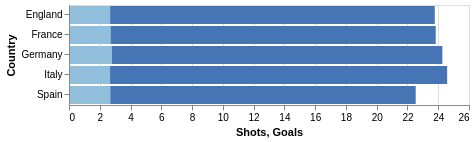

In [43]:
import altair as alt
colorPalette = ['#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4']
baseALL = alt.Chart(matchDf)
goalsALT = baseALL.mark_bar(color = colorPalette[-2]).encode(
    y = alt.X('Country:N'),
    x = alt.Y('Goals:Q')
)

shotsALT = baseALL.mark_bar(color = colorPalette[-1]).encode(
    y = alt.X('Country:N'),
    x = alt.Y('Shots:Q')
)

alt.layer(
shotsALT, goalsALT
).resolve_scale('independent')

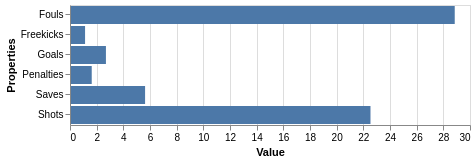

In [15]:
#spain plot
import altair as alt
colorPalette = ['#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4']
baseSPA = alt.Chart(SpainDf)

bars = baseSPA.mark_bar().encode(
    y = alt.Y('Properties:N'),
    x = alt.X('Value:Q')
)




In [ ]:
import altair as alt
#alt.data_transformers.enable('json')
colorPalette = ['#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4']
base = alt.Chart(matchDf,width=500, height=300)

one = base.mark_bar().encode(
    x = alt.X('Country', sort=countries),
    #y = 'Shots:Q',
    y ='Goals:Q',
    color = alt.Color('Country:N',
    scale=alt.Scale(domain=['France', 'Spain', 'England', 'Germany', 'Italy'],
    range=['#8c510a','#d8b365','#f6e8c3','#c7eae5','#5ab4ac','#01665e']))
    #color = 'Country:N'
)
two = base.mark_bar().encode(
    x= alt.X('Country', sort=countries),
    y='Shots:Q',
    #color = 'Country:N'
    color = alt.Color('Country:N',
    scale=alt.Scale(domain=['France', 'Spain', 'England', 'Germany', 'Italy'],
    range=['#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4'])),

)

alt.layer(
two, one
).resolve_scale('independent')


In [17]:
import altair as alt
#alt.data_transformers.enable('json')
base = alt.Chart(shotsGoals,width=500, height=300).transform_calculate(
    yGoalsMin="datum.Goals-datum.GoalsStd",
    yGoalsMax="datum.Goals+datum.GoalsStd",
    yShotsMin="datum.Shots-datum.ShotsStd",
    yShotsMax="datum.Shots+datum.ShotsStd",
)

colorPalette = ['#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4']
#color = colorPalette[-1]
goalsAlt = base.mark_bar(color = colorPalette[-2] ).encode(
    y = alt.Y('Country', sort=countries),
    x = 'Goals:Q',
    #color = 'Country:N',
)

# goalsStdAlt = base.mark_errorbar().encode(
#     y = alt.Y('Country', sort=countries),
#     #y = 'Shots:Q',
#     x =alt.X('yGoalsMin:Q', axis=alt.Axis(title='')),
#     x2 = 'yGoalsMax:Q',
#     #color = 'Country:N',
# )


shotsAlt = base.mark_bar( color = colorPalette[-1] ).encode(
    y= alt.Y('Country', sort=countries),
    x=alt.X('Shots:Q', axis=alt.Axis(title='Shots and goals')),
    #color = 'Country:N'
)

# shotsStdAlt = base.mark_errorbar().encode(
#     y = alt.Y('Country', sort=countries),
#     x = alt.X('yShotsMin:Q',axis=alt.Axis(title='') ),
#     x2 = 'yShotsMax:Q'
# )

alt.layer( shotsAlt, goalsAlt
).resolve_scale('independent')

NameError: name 'shotsGoals' is not defined


# Classification

In [ ]:
def get_goals_per_game(teamsData):
    keys_team_data = list(teamsData.keys())
    return {keys_team_data[0]:teamsData[keys_team_data[0]]['score'],keys_team_data[1]:teamsData[keys_team_data[1]]['score']}

In [ ]:
def get_points_per_score(teamsData): #{'3783': 2, '3767': 1}    
    keys_team_data = list(teamsData.keys())    
    score_match = get_goals_per_game(teamsData)
    if score_match[keys_team_data[0]]==score_match[keys_team_data[1]]:
        return {keys_team_data[0]:1,keys_team_data[1]:1}
    if score_match[keys_team_data[0]]>score_match[keys_team_data[1]]:
        return {keys_team_data[0]:3,keys_team_data[1]:0}
    if score_match[keys_team_data[0]]<score_match[keys_team_data[1]]:
        return {keys_team_data[0]:0,keys_team_data[1]:3}

In [ ]:
def get_points_round(round_matches):
    matches_selected = round_matches.sort_values('gameweek')
    dicts = matches_selected.apply(lambda x: get_points_per_score(x['teamsData']), axis=1)
    return dict(ChainMap(*list(dicts)))

In [ ]:
def get_points_league(matches):
    all_rounds = {}
    for gameweek, matches_played in matches.groupby('gameweek'):
        all_rounds[gameweek]=get_points_round(matches_played)
    return pd.DataFrame.from_dict(all_rounds)

In [ ]:
# points = get_points_league(matches)

In [ ]:
def get_points_aggregated_by_round(matches):
    points = get_points_league(matches)
    for round_i in range(2,len(points.columns)+1):
        points[round_i]=points[[round_i-1,round_i]].sum(axis=1)
    return points

In [ ]:
# points_agg = get_points_aggregated_by_round(matches)

In [ ]:
def get_classification_by_round(matches):
    points_agg = get_points_aggregated_by_round(matches)
    return points_agg.rank(method='first',ascending=False).astype(int)

In [ ]:
#classification = get_classification_by_round(matches)

In [ ]:
def get_frequency_of_position_changes(matches):
    classification = get_classification_by_round(matches)
    all_ranks = [rank for team in classification.values
         for rank in [rank for i, rank in enumerate(team) 
            if i==0 or team[i-1]!=rank]]
    unique, counts = np.unique(all_ranks, return_counts=True)
    return pd.Series(dict(zip(unique, counts)))

In [ ]:
import matplotlib.pyplot
%matplotlib inline
get_frequency_of_position_changes(matches).plot.barh()

In [ ]:
# win / month

# Players

In [ ]:
playerProfiles = pd.read_json('players/players.json')#.set_index('Id')    
players = pd.read_json('players/playerank.json')#.set_index('Id')

players.head()

In [ ]:
playerProfiles.head()

In [ ]:
playerRank = players.groupby('playerId').mean()
playerRank.head()

In [ ]:
import altair as alt

len(playerRank)